In [11]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('map.png')
image = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))

In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray = cv2.GaussianBlur(image_gray, (1, 1), 0)

In [5]:
gX = cv2.Sobel(image_gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
gY = cv2.Sobel(image_gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)
img_sobel = cv2.addWeighted(gX, 1, gY, 1, 0)

In [6]:
canny_image = cv2.Canny(image_gray, 110, 200)

In [7]:
image_2 = cv2.imread('map.png', 0).astype('float64')
image_2 /= 255.0

In [8]:
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )

In [14]:
vertical = ndimage.convolve( image_2, roberts_cross_v )
horizontal = ndimage.convolve( image_2, roberts_cross_h )
roberts_img = np.sqrt( np.square(horizontal) + np.square(vertical))
roberts_img*=255

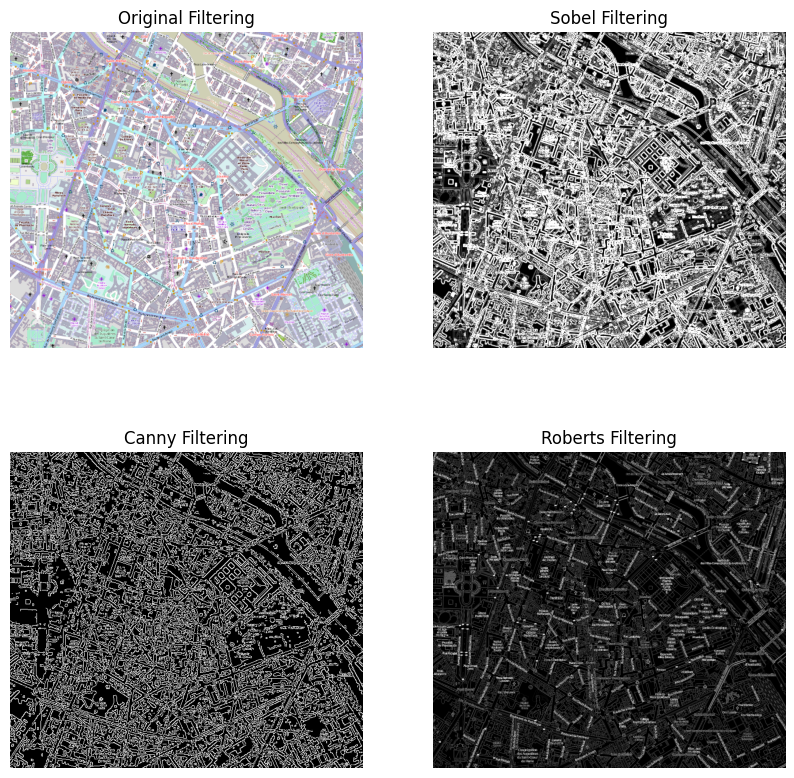

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].imshow(image)
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Filtering')
axs[0, 1].imshow(cv2.cvtColor(img_sobel, cv2.COLOR_GRAY2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Sobel Filtering')
axs[1, 0].imshow(cv2.cvtColor(canny_image, cv2.COLOR_GRAY2RGB))
axs[1, 0].axis('off')
axs[1, 0].set_title('Canny Filtering')
axs[1, 1].imshow(cv2.cvtColor(roberts_img.astype(np.uint8), cv2.COLOR_GRAY2RGB))
axs[1, 1].axis('off')
axs[1, 1].set_title('Roberts Filtering')
plt.show()

- Фільтр Sobel простий і швидкий, але він cтворює товсті краї та чутливий до шуму.
- Фільтр Canny більш точний, ніж фільтр Sobel, і менш чутливий до шуму. Він створює тонкі та чітко окреслені краї. Фільтр Canny повільніший за фільтр Sobel, але він більше підходить для більшості застосувань.
- Реакція фільтра Roberts не така гладка, як у фільтрів Sobel і Canny, і може призвести до нерівних країв. Він швидший, ніж фільтри Sobel і Canny, але також менш точний. Бачимо на зображені як він чітко виділив назви доріг, але не їх краї